<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_4_6_exercice_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer['data'], columns = cancer["feature_names"])
df["target"]=cancer['target']

In [3]:
X=df.loc[:, df.columns != 'target']
y=df["target"]

In [4]:
X, y = load_breast_cancer(return_X_y=True)

In [5]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.4, random_state=0)

In [6]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf = clf.fit(X_train, y_train)

In [7]:
clf.score(X_train, y_train)

0.9325513196480938

In [8]:
clf.score(X_test, y_test)

0.9517543859649122

In [9]:

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


In [10]:
res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])
print(res_scores)

    n_neighbors  train_score  test_score
0             1     1.000000    0.929825
1             2     0.950147    0.916667
2             3     0.947214    0.938596
3             4     0.938416    0.942982
4             5     0.932551    0.951754
5             6     0.926686    0.947368
6             7     0.929619    0.956140
7             8     0.926686    0.960526
8             9     0.917889    0.964912
9            10     0.920821    0.964912
10           11     0.923754    0.964912
11           12     0.923754    0.960526
12           13     0.917889    0.964912
13           14     0.917889    0.964912
14           15     0.917889    0.964912
15           16     0.920821    0.960526
16           17     0.926686    0.960526
17           18     0.920821    0.960526
18           19     0.912023    0.960526
19           20     0.917889    0.960526
20           21     0.909091    0.960526
21           22     0.912023    0.960526
22           23     0.909091    0.960526
23           24 

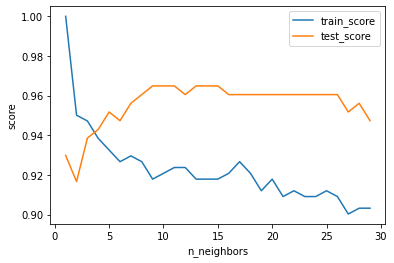

In [11]:
import matplotlib.pyplot as plt
res_scores.plot(kind="line",x="n_neighbors",y="train_score")
plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
            test_size=0.2, random_state=0)

scaler = MinMaxScaler()
#scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


    n_neighbors  train_score  test_score
0             1     1.000000    0.947368
1             2     0.971429    0.938596
2             3     0.986813    0.947368
3             4     0.980220    0.956140
4             5     0.980220    0.956140
5             6     0.971429    0.982456
6             7     0.980220    0.964912
7             8     0.973626    0.973684
8             9     0.980220    0.973684
9            10     0.980220    0.982456
10           11     0.980220    0.973684
11           12     0.973626    0.973684
12           13     0.978022    0.973684
13           14     0.980220    0.973684
14           15     0.971429    0.973684
15           16     0.971429    0.973684
16           17     0.969231    0.973684
17           18     0.973626    0.973684
18           19     0.969231    0.973684
19           20     0.971429    0.964912
20           21     0.969231    0.964912
21           22     0.971429    0.964912
22           23     0.964835    0.964912
23           24 

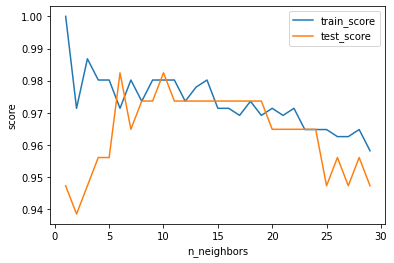

In [13]:

rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

# Exercice

**Question** Changer le paramètre `p` et analyser l'impact sur le modèle

    n_neighbors  train_score  test_score
0             1     1.000000    0.956140
1             2     0.971429    0.938596
2             3     0.986813    0.947368
3             4     0.971429    0.938596
4             5     0.973626    0.938596
5             6     0.971429    0.947368
6             7     0.964835    0.938596
7             8     0.960440    0.938596
8             9     0.958242    0.938596
9            10     0.956044    0.947368
10           11     0.956044    0.938596
11           12     0.956044    0.938596
12           13     0.953846    0.938596
13           14     0.951648    0.938596
14           15     0.949451    0.938596
15           16     0.951648    0.947368
16           17     0.949451    0.956140
17           18     0.945055    0.956140
18           19     0.949451    0.947368
19           20     0.949451    0.947368
20           21     0.945055    0.947368
21           22     0.945055    0.947368
22           23     0.945055    0.947368
23           24 

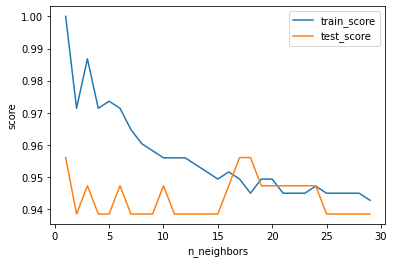

In [15]:
rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei,p=nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test)])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score"])
print(res_scores)

res_scores.plot(kind="line",x="n_neighbors",y="train_score")

plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()
#l'impact sur lodèle en changeant le paramètre p est qu'il y a une plus grande divergence entre les datas et les tests

**Question** Créer le même type de courbe en prenant le score F1.

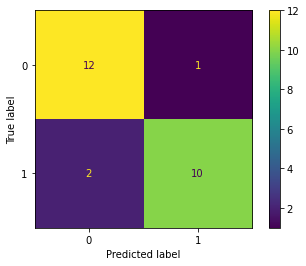

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [21]:
accuracy = 1 - ((2+1)/(12+1+2+10))
print("accuracy : ",round(accuracy * 100,2)," %")

precision = 10/(10+2)
print("precision : ",round(precision * 100,2)," %")

rappel = 10 / (10+2)
print("rappel : ",round(rappel * 100,2)," %")

score_F1 = 2 * ((precision * rappel)/(precision + rappel))
print("score F1 : ",round(score_F1 * 100,2)," %")

accuracy :  88.0  %
precision :  83.33  %
rappel :  83.33  %
score F1 :  83.33  %


    n_neighbors  train_score  test_score  score_F1
0             1     1.000000        0.76  0.833333
1             2     0.906667        0.68  0.833333
2             3     0.933333        0.72  0.833333
3             4     0.893333        0.68  0.833333
4             5     0.880000        0.64  0.833333
5             6     0.866667        0.64  0.833333
6             7     0.880000        0.60  0.833333
7             8     0.840000        0.64  0.833333
8             9     0.920000        0.64  0.833333
9            10     0.840000        0.68  0.833333
10           11     0.826667        0.72  0.833333
11           12     0.813333        0.68  0.833333
12           13     0.826667        0.68  0.833333
13           14     0.786667        0.72  0.833333
14           15     0.826667        0.80  0.833333
15           16     0.800000        0.72  0.833333
16           17     0.786667        0.72  0.833333
17           18     0.773333        0.72  0.833333
18           19     0.786667   

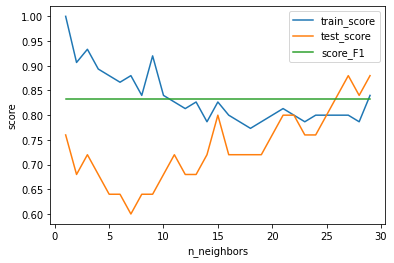

In [25]:
rows = []

for nnei in range(1,30):
    clf = KNeighborsClassifier(n_neighbors = nnei,p=nnei)
    clf = clf.fit(X_train, y_train)
    rows.append([nnei,clf.score(X_train, y_train), clf.score(X_test, y_test),score_F1])


res_scores = pd.DataFrame(rows, columns=["n_neighbors","train_score", "test_score","score_F1"])
print(res_scores)

res_scores.plot(kind="line",x="n_neighbors",y="train_score")
plt.plot(res_scores["n_neighbors"],res_scores["test_score"], label = "test_score")
plt.plot(res_scores["n_neighbors"],res_scores["score_F1"], label = "score_F1")
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()
plt.show()